# Overview

The project for Machine learning has the goal to create a End-to-End project using teh knowlages during the cource using a data set selected by myself.

# Target of the Project

In [1]:
%matplotlib inline

In [830]:
import re
import pandas as pd
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

import seaborn as sns

import mlflow.sklearn

from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, OneHotEncoder, FunctionTransformer
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline
from sklearn.compose import ColumnTransformer


from sklearn.impute import SimpleImputer

from sklearn.linear_model import LogisticRegression, LinearRegression

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error, accuracy_score, precision_recall_fscore_support

import mlflow
from mlflow.models import infer_signature


#  Data Set
This dataset shows the Battery Electric Vehicles (BEVs) and Plug-in Hybrid Electric Vehicles (PHEVs) that are currently registered through Washington State Department of Licensing (DOL).

- https://www.kaggle.com/datasets/rajkumarpandey02/electric-vehicle-population-data/data


# Workflow To Be Followed

- Step 1: Loading The Dataset
- Step 2: Performing EDA
- Step 3: Feature Engineering
- Step 4: Model Training & Evaluation 

Preparing and run the mlflow instance to log the results of the experements. For each run is set a name of the run with the changes or the target of the run

In [3]:
experiment = mlflow.create_experiment(name = "LinearRegression")

In [198]:
run = mlflow.start_run(experiment_id = experiment, run_name="LinerRegression)

## Step 1: Loading The Dataset

In [834]:
# Load the data set
electric_vehicles = pd.read_csv("data/Electric_Vehicle_Population_Data.csv")

# Data Preprocessing

The data set contains 17 colums 
- VIN (1-10)
- County 	
- ...

In [480]:
electric_vehicles

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EA0K,Thurston,Tumwater,WA,98512.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,22.0,242565116,POINT (-122.91310169999997 47.01359260000004),PUGET SOUND ENERGY INC,5.306701e+10
1,1N4BZ1DV4N,Island,Clinton,WA,98236.0,2022,NISSAN,LEAF,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,10.0,183272785,POINT (-122.35936399999997 47.97965520000008),PUGET SOUND ENERGY INC,5.302997e+10
2,5YJ3E1EA0L,Snohomish,Snohomish,WA,98290.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,266.0,0.0,44.0,112552366,POINT (-122.09150499999998 47.91555500000004),PUGET SOUND ENERGY INC,5.306105e+10
3,5YJ3E1EBXL,King,Seattle,WA,98134.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322.0,0.0,11.0,6336319,POINT (-122.32981499999994 47.579810000000066),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1CP0D,Snohomish,Edmonds,WA,98020.0,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208.0,69900.0,21.0,186212960,POINT (-122.37507 47.80807000000004),PUGET SOUND ENERGY INC,5.306105e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135033,5YJSA1E29L,King,Yarrow Point,WA,98004.0,2020,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,330.0,0.0,48.0,124776627,POINT (-122.20190499999995 47.61385000000007),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
135034,5YJYGDEE7M,King,Burien,WA,98168.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,33.0,142857676,POINT (-122.28645999999998 47.47613000000007),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303303e+10
135035,5YJSA1E51N,Pierce,Gig Harbor,WA,98335.0,2022,TESLA,MODEL S,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,26.0,220157724,POINT (-122.58354539999999 47.32344880000005),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305307e+10
135036,KM8KMDAF3P,Grant,Ephrata,WA,98823.0,2023,HYUNDAI,IONIQ 5,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,13.0,223872596,POINT (-119.55512999999996 47.319360000000074),PUD NO 2 OF GRANT COUNTY,5.302501e+10


Check the data type of each column. Which column is has the data type object and which has the data type of number (float64 and int64)

In [555]:
electric_vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135038 entries, 0 to 135037
Data columns (total 20 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         135038 non-null  object 
 1   County                                             135038 non-null  object 
 2   City                                               135038 non-null  object 
 3   State                                              135038 non-null  object 
 4   Postal Code                                        135030 non-null  float64
 5   Model Year                                         135038 non-null  int64  
 6   Make                                               135038 non-null  object 
 7   Model                                              134789 non-null  object 
 8   Electric Vehicle Type                              135038 non-null  object

In [797]:
#Check for each column if null/None/NaN is existing 
null_counts = electric_vehicles.isnull().sum()
null_counts

VIN (1-10)                                             0
County                                                 8
City                                                   8
State                                                  0
Postal Code                                            8
Model Year                                             0
Make                                                   0
Model                                                249
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         1
Base MSRP                                              1
Legislative District                                 312
DOL Vehicle ID                                         0
Vehicle Location                                      10
Electric Utility                                       8
2020 Census Tract                                      8
dtype: int64

As we can see in some of the colums NaN are existing. The NaN will be manage for each Column separately. 
The easier way be not eliminate for the complete data set all rows which contains NaN. It is beeter first to analyse each column with NaN values before to drop all NaN values
with the function __dropna()__
We can assume that the columns _County_, _City_ and _Postal Code_ have NaN in the same rows, because of the dependancies between _Country_, _City_ and _Postal Code_ 

# Feature Engineering

## Feature - County

Let us look at the column __Country__.
First we should check  the unique values of  the column 'Country' and to print the table (rows) only with the NaN values to see which information will be lost if we drop this rows.

In [481]:
electric_vehicles['County'].isnull().sum()

8

In [482]:
countries_null_rows = electric_vehicles[electric_vehicles['County'].isna()]
countries_null_rows

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
149,1N4AZ0CP1D,NaN,NaN,AP,NaN,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75.0,0.0,NaN,112277063,NaN,NaN,NaN
116884,JTDKARFP2H,NaN,NaN,TX,NaN,2017,TOYOTA,PRIUS PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25.0,0.0,NaN,205594980,NaN,NaN,NaN
124298,5YJ3E1EBXJ,NaN,NaN,CA,NaN,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.0,0.0,NaN,345290382,NaN,NaN,NaN
126012,5YJYGAEE4M,NaN,NaN,KS,NaN,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,NaN,167228722,NaN,NaN,NaN
126131,5YJRE11B48,NaN,NaN,BC,NaN,2008,TESLA,ROADSTER,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,98950.0,NaN,143609049,NaN,NaN,NaN
130433,5YJYGDEEXM,NaN,NaN,CA,NaN,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,NaN,152377718,NaN,NaN,NaN
131491,JTDKN3DP5E,NaN,NaN,CA,NaN,2014,TOYOTA,PRIUS PLUG-IN,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,6.0,0.0,NaN,476092333,NaN,NaN,NaN
131586,5YJ3E1EA5K,NaN,NaN,BC,NaN,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,NaN,475254825,NaN,NaN,NaN


In [535]:
#electric_vehicles['County'] = electric_vehicles['County'].fillna('Unknown')

In [485]:
electric_vehicles['County'].isnull().sum()

0

In [489]:
electric_vehicles['County'].unique()

array(['Thurston', 'Island', 'Snohomish', 'King', 'Chelan', 'Kitsap',
       'Yakima', 'Marin', 'Whitman', 'Skagit', 'Pend Oreille', 'Pierce',
       'Maricopa', 'Douglas', 'Grant', 'Columbia', 'Unknown', 'Spokane',
       'Clark', 'San Juan', 'Whatcom', 'Clallam', 'Cowlitz', 'Lewis',
       'Benton', 'Walla Walla', 'Jefferson', 'Kittitas', 'Okanogan',
       'Mason', 'Stevens', 'Garfield', 'Skamania', 'Franklin',
       'Grays Harbor', 'Klickitat', 'Adams', 'Kings', 'Pacific',
       'Wahkiakum', 'Ferry', 'Asotin', 'Lake', 'Leavenworth', 'San Diego',
       'Fairfax', 'Stafford', 'Lincoln', 'Loudoun', 'Sarpy',
       'District of Columbia', 'Los Angeles', 'Anne Arundel', 'Galveston',
       'Kern', 'Virginia Beach', 'Contra Costa', 'San Bernardino',
       'Salt Lake', "St. Mary's", 'Ventura', 'Rockdale', 'Cook',
       'Chesapeake', 'Moore', 'St. Clair', 'Beaufort', 'Portsmouth',
       'Riverside', 'Ray', "Prince George's", 'Solano', 'Monterey',
       'El Paso', 'Pulaski', 'Cumberl

In [536]:
electric_vehicles['County'].value_counts()

County
King         70842
Snohomish    15258
Pierce       10410
Clark         7997
Thurston      4851
             ...  
Platte           1
St. Clair        1
Oldham           1
Larimer          1
Nassau           1
Name: count, Length: 170, dtype: int64

If we can see there are 170 countries. Now is the question, how we can transform the countries to a number as categories? If we use the __LabelEncoder__ provided by the sklearn library, so
all countries will be assign to unique numerical label in the feature. The problem is that __LabelEncoder__ is appropriate when there is an ordinal relationship between the categories (i.e., one category is greater than or less than another). In our case this can be a problem for some of the machine algorithms, because using __LabelEncoder__ might introduce unintended relationships in the model. 
Another option is to use __OneHotEncoder__. OneHotEncoder is used to convert categorical integer features into one-hot encoded vectors. Each integer value is represented as a binary vector where all values are zero except the index that is marked with a 1. In our case we will inscrease the features with additiolan 170 features. This can be a problem, because of the heigh varians by the learning the model.
So this two solutions maybe are not the correct solution for the column __Country__. So what we want to acheaved? Mainly we want to present the rank of each country base on the saled vehicles in this country. This will be provide us the posibility to clarify how importent is each country and to set the priority of each country.

In [553]:
def add_priority_numbers(df, column_name):
    column_counts = df[column_name].value_counts()
    total_number_of_unique = len(column_counts)
    priority_numbers = {value: total_number_of_unique - rank + 1 for rank, value in enumerate(column_counts.index, start=1)}
    df[column_name + '_priority'] = df[column_name].map(priority_numbers)
    return df


def fill_in_colum_with_unknown(df, column_name):
    column_values = df[column_name].fillna('Unknown')
    df[column_name] = column_values
    return  df


In [532]:
country_pipeline = Pipeline(steps = [
    ('fill_na', FunctionTransformer(func= fill_in_colum_with_unknown, kw_args={'column_name': 'County'})),
    ('add_priority_numbers', FunctionTransformer(func= add_priority_numbers, kw_args={'column_name':'County'})),
    #('create_matrix', FunctionTransformer(func= lambda x: x.todence()))
])

In [533]:
country_pipeline.fit_transform(electric_vehicles)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract,County_priority
0,5YJ3E1EA0K,Thurston,Tumwater,WA,98512.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,22.0,242565116,POINT (-122.91310169999997 47.01359260000004),PUGET SOUND ENERGY INC,5.306701e+10,166
1,1N4BZ1DV4N,Island,Clinton,WA,98236.0,2022,NISSAN,LEAF,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,10.0,183272785,POINT (-122.35936399999997 47.97965520000008),PUGET SOUND ENERGY INC,5.302997e+10,160
2,5YJ3E1EA0L,Snohomish,Snohomish,WA,98290.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,266.0,0.0,44.0,112552366,POINT (-122.09150499999998 47.91555500000004),PUGET SOUND ENERGY INC,5.306105e+10,169
3,5YJ3E1EBXL,King,Seattle,WA,98134.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322.0,0.0,11.0,6336319,POINT (-122.32981499999994 47.579810000000066),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10,170
4,5YJSA1CP0D,Snohomish,Edmonds,WA,98020.0,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208.0,69900.0,21.0,186212960,POINT (-122.37507 47.80807000000004),PUGET SOUND ENERGY INC,5.306105e+10,169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135033,5YJSA1E29L,King,Yarrow Point,WA,98004.0,2020,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,330.0,0.0,48.0,124776627,POINT (-122.20190499999995 47.61385000000007),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10,170
135034,5YJYGDEE7M,King,Burien,WA,98168.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,33.0,142857676,POINT (-122.28645999999998 47.47613000000007),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303303e+10,170
135035,5YJSA1E51N,Pierce,Gig Harbor,WA,98335.0,2022,TESLA,MODEL S,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,26.0,220157724,POINT (-122.58354539999999 47.32344880000005),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305307e+10,168
135036,KM8KMDAF3P,Grant,Ephrata,WA,98823.0,2023,HYUNDAI,IONIQ 5,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,13.0,223872596,POINT (-119.55512999999996 47.319360000000074),PUD NO 2 OF GRANT COUNTY,5.302501e+10,148


Chek if 

In [534]:
electric_vehicles['County'].isnull().sum()

0

In [537]:
city_pipeline = Pipeline(steps = [
    ('fill_na', FunctionTransformer(func= fill_in_colum_with_unknown, kw_args={'column_name': 'City'})),
    ('add_priority_numbers', FunctionTransformer(func= add_priority_numbers, kw_args={'column_name':'City'})),
])

In [546]:
state_pipeline = Pipeline(steps = [
    ('add_priority_numbers', FunctionTransformer(func= add_priority_numbers, kw_args={'column_name':'State'})),
])

In [655]:
features_vehicles_pipeline = FeatureUnion([
    ('country_feature', country_pipeline),
    ('city_feature', city_pipeline),
    ('state_feature', state_pipeline)
])

In [656]:
features_vehicles_pipeline

FeatureUnion(transformer_list=[('country_feature',
                                Pipeline(steps=[('fill_na',
                                                 FunctionTransformer(func=<function fill_in_colum_with_unknown at 0x000001F6F29A10D0>,
                                                                     kw_args={'column_name': 'County'})),
                                                ('add_priority_numbers',
                                                 FunctionTransformer(func=<function add_priority_numbers at 0x000001F6F29A1700>,
                                                                     kw_args={'column_name': 'County'}))])),
                               ('city_feature',
                                Pi...
                                                 FunctionTransformer(func=<function fill_in_colum_with_unknown at 0x000001F6F29A10D0>,
                                                                     kw_args={'column_name': 'City'})),
                                                ('add_priority_numbers',
                                                 FunctionTransformer(func=<function add_priority_numbers at 0x000001F6F29A1700>,
                                                                     kw_args={'column_name': 'City'}))])),
                               ('state_feature',
                                Pipeline(steps=[('add_priority_numbers',
                                                 FunctionTransformer(func=<function add_priority_numbers at 0x000001F6F29A1700>,
                                                                     kw_args={'column_name': 'State'}))]))])

In [657]:
features_vehicles_pipeline.fit_transform(electric_vehicles)

array([['5YJ3E1EA0K', 'Thurston', 'Tumwater', ..., 166, 599, 46],
       ['1N4BZ1DV4N', 'Island', 'Clinton', ..., 160, 547, 46],
       ['5YJ3E1EA0L', 'Snohomish', 'Snohomish', ..., 169, 634, 46],
       ...,
       ['5YJSA1E51N', 'Pierce', 'Gig Harbor', ..., 168, 633, 46],
       ['KM8KMDAF3P', 'Grant', 'Ephrata', ..., 148, 469, 46],
       ['1FADP5CU4E', 'Kitsap', 'Port Orchard', ..., 165, 618, 46]],
      dtype=object)

In [658]:
electric_vehicles

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract,County_priority,City_priority,State_priority
0,5YJ3E1EA0K,Thurston,Tumwater,WA,98512.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,22.0,242565116,POINT (-122.91310169999997 47.01359260000004),PUGET SOUND ENERGY INC,5.306701e+10,166,599,46
1,1N4BZ1DV4N,Island,Clinton,WA,98236.0,2022,NISSAN,LEAF,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,10.0,183272785,POINT (-122.35936399999997 47.97965520000008),PUGET SOUND ENERGY INC,5.302997e+10,160,547,46
2,5YJ3E1EA0L,Snohomish,Snohomish,WA,98290.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,266.0,0.0,44.0,112552366,POINT (-122.09150499999998 47.91555500000004),PUGET SOUND ENERGY INC,5.306105e+10,169,634,46
3,5YJ3E1EBXL,King,Seattle,WA,98134.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322.0,0.0,11.0,6336319,POINT (-122.32981499999994 47.579810000000066),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10,170,652,46
4,5YJSA1CP0D,Snohomish,Edmonds,WA,98020.0,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208.0,69900.0,21.0,186212960,POINT (-122.37507 47.80807000000004),PUGET SOUND ENERGY INC,5.306105e+10,169,631,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135033,5YJSA1E29L,King,Yarrow Point,WA,98004.0,2020,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,330.0,0.0,48.0,124776627,POINT (-122.20190499999995 47.61385000000007),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10,170,534,46
135034,5YJYGDEE7M,King,Burien,WA,98168.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,33.0,142857676,POINT (-122.28645999999998 47.47613000000007),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303303e+10,170,611,46
135035,5YJSA1E51N,Pierce,Gig Harbor,WA,98335.0,2022,TESLA,MODEL S,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,26.0,220157724,POINT (-122.58354539999999 47.32344880000005),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305307e+10,168,633,46
135036,KM8KMDAF3P,Grant,Ephrata,WA,98823.0,2023,HYUNDAI,IONIQ 5,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,13.0,223872596,POINT (-119.55512999999996 47.319360000000074),PUD NO 2 OF GRANT COUNTY,5.302501e+10,148,469,46


## Feature - Make 	

In [554]:
electric_vehicles.Make.unique()

array(['TESLA', 'NISSAN', 'BMW', 'AUDI', 'TOYOTA', 'KIA', 'FIAT', 'FORD',
       'CHEVROLET', 'HYUNDAI', 'VOLVO', 'VOLKSWAGEN', 'CHRYSLER', 'SMART',
       'RIVIAN', 'SUBARU', 'JEEP', 'HONDA', 'LINCOLN', 'LUCID', 'PORSCHE',
       'MITSUBISHI', 'POLESTAR', 'MERCEDES-BENZ', 'MINI', 'JAGUAR',
       'CADILLAC', 'LEXUS', 'GENESIS', 'WHEEGO ELECTRIC CARS', 'FISKER',
       'MAZDA', 'BENTLEY', 'TH!NK', 'LAND ROVER', 'AZURE DYNAMICS'],
      dtype=object)

In [557]:
len(electric_vehicles.Make.unique())

36

In [561]:
electric_vehicles.Make.isnull().sum()

0

In [762]:
def execute_one_hod_encoder(df, column_name):
    ohe_make = OneHotEncoder()
    encoded_cafv = ohe_make.fit_transform(df[column_name].values.reshape(-1, 1)).toarray()
    ohe_df = pd.DataFrame(encoded_cafv, columns=ohe_make.get_feature_names_out())
    df = pd.concat([df, ohe_df], axis=1)
    return df

    

In [ ]:
# ARCHIVE - NOT WORKING

# Define the function for make_pipeline_ct
def make_pipeline_ct():
    return FunctionTransformer(execute_one_hod_encoder, kw_args={'column_name': 'Make'})


class OneHotEncoderTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, column_name):
        self.column_name = column_name
        self.ohe_make = OneHotEncoder()

    def fit(self, X, y=None):
        self.ohe_make.fit(X[self.column_name].values.reshape(-1, 1))
        return self

    def transform(self, X):
        encoded_cafv = self.ohe_make.transform(X[self.column_name].values.reshape(-1, 1)).toarray()
        ohe_df = pd.DataFrame(encoded_cafv, columns=self.ohe_make.get_feature_names_out())
        return pd.concat([X, ohe_df], axis=1)

In [727]:
make_pipeline = Pipeline(steps = [
    ('ohn_make', FunctionTransformer(func= execute_one_hod_encoder, kw_args={'column_name':'Make'})),
])

#make_pipeline_ct = ColumnTransformer([
    #('ohe_make', OneHotEncoder(), ['Make']),
#    ('ohn_make', FunctionTransformer(func= execute_one_hod_encoder, kw_args={'column_name':'Make'}), ['Make']),
    
#])

In [728]:
electric_vehicles = make_pipeline.fit_transform(electric_vehicles)

Check if the number of the columns is increase with the number of the makes (36 unique makes)

In [729]:
electric_vehicles.shape

(135038, 53)

In [806]:
features_vehicles_pipeline = FeatureUnion([
    ('country_feature', country_pipeline),
    ('city_feature', city_pipeline),
    ('state_feature', state_pipeline)
])

In [731]:
features_vehicles_pipeline

FeatureUnion(transformer_list=[('country_feature',
                                Pipeline(steps=[('fill_na',
                                                 FunctionTransformer(func=<function fill_in_colum_with_unknown at 0x000001F6F29A10D0>,
                                                                     kw_args={'column_name': 'County'})),
                                                ('add_priority_numbers',
                                                 FunctionTransformer(func=<function add_priority_numbers at 0x000001F6F29A1700>,
                                                                     kw_args={'column_name': 'County'}))])),
                               ('city_feature',
                                Pi...
                                                 FunctionTransformer(func=<function fill_in_colum_with_unknown at 0x000001F6F29A10D0>,
                                                                     kw_args={'column_name': 'City'})),
                                                ('add_priority_numbers',
                                                 FunctionTransformer(func=<function add_priority_numbers at 0x000001F6F29A1700>,
                                                                     kw_args={'column_name': 'City'}))])),
                               ('state_feature',
                                Pipeline(steps=[('add_priority_numbers',
                                                 FunctionTransformer(func=<function add_priority_numbers at 0x000001F6F29A1700>,
                                                                     kw_args={'column_name': 'State'}))]))])

In [732]:
features_vehicles_pipeline.fit_transform(electric_vehicles)

array([['5YJ3E1EA0K', 'Thurston', 'Tumwater', ..., 166, 599, 46],
       ['1N4BZ1DV4N', 'Island', 'Clinton', ..., 160, 547, 46],
       ['5YJ3E1EA0L', 'Snohomish', 'Snohomish', ..., 169, 634, 46],
       ...,
       ['5YJSA1E51N', 'Pierce', 'Gig Harbor', ..., 168, 633, 46],
       ['KM8KMDAF3P', 'Grant', 'Ephrata', ..., 148, 469, 46],
       ['1FADP5CU4E', 'Kitsap', 'Port Orchard', ..., 165, 618, 46]],
      dtype=object)

In [733]:
electric_vehicles.shape

(135038, 56)

## Feature - Clean Alternative Fuel Vehicle (CAFV) Eligibility

In [416]:
electric_vehicles['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].unique()

array(['Clean Alternative Fuel Vehicle Eligible',
       'Eligibility unknown as battery range has not been researched',
       'Not eligible due to low battery range'], dtype=object)

In [434]:
ohe = OneHotEncoder()
encoded_cafv = ohe.fit_transform(electric_vehicles['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].values.reshape(-1, 1)).toarray()
encoded_cafv

array([[1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [734]:
cafv_pipeline = Pipeline(steps = [
    ('ohn_cafv', FunctionTransformer(func= execute_one_hod_encoder, kw_args={'column_name':'Clean Alternative Fuel Vehicle (CAFV) Eligibility'})),
])

In [735]:
cafv_pipeline.fit_transform(electric_vehicles)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,...,x0_TOYOTA,x0_VOLKSWAGEN,x0_VOLVO,x0_WHEEGO ELECTRIC CARS,County_priority,City_priority,State_priority,x0_Clean Alternative Fuel Vehicle Eligible,x0_Eligibility unknown as battery range has not been researched,x0_Not eligible due to low battery range
0,5YJ3E1EA0K,Thurston,Tumwater,WA,98512.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,...,0.0,0.0,0.0,0.0,166,599,46,1.0,0.0,0.0
1,1N4BZ1DV4N,Island,Clinton,WA,98236.0,2022,NISSAN,LEAF,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,...,0.0,0.0,0.0,0.0,160,547,46,0.0,1.0,0.0
2,5YJ3E1EA0L,Snohomish,Snohomish,WA,98290.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,...,0.0,0.0,0.0,0.0,169,634,46,1.0,0.0,0.0
3,5YJ3E1EBXL,King,Seattle,WA,98134.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,...,0.0,0.0,0.0,0.0,170,652,46,1.0,0.0,0.0
4,5YJSA1CP0D,Snohomish,Edmonds,WA,98020.0,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,...,0.0,0.0,0.0,0.0,169,631,46,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135033,5YJSA1E29L,King,Yarrow Point,WA,98004.0,2020,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,...,0.0,0.0,0.0,0.0,170,534,46,1.0,0.0,0.0
135034,5YJYGDEE7M,King,Burien,WA,98168.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,...,0.0,0.0,0.0,0.0,170,611,46,0.0,1.0,0.0
135035,5YJSA1E51N,Pierce,Gig Harbor,WA,98335.0,2022,TESLA,MODEL S,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,...,0.0,0.0,0.0,0.0,168,633,46,0.0,1.0,0.0
135036,KM8KMDAF3P,Grant,Ephrata,WA,98823.0,2023,HYUNDAI,IONIQ 5,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,...,0.0,0.0,0.0,0.0,148,469,46,0.0,1.0,0.0


In [760]:
#ARCHIVE - NOT WORKING
electric_vehicles_pipeline = Pipeline(steps = [
    ('features_vehicles_pipeline', features_vehicles_pipeline),
    ('make_pipeline_ct', make_pipeline(OneHotEncoderTransformer(column_name='Make')))
    #('make_pipeline_ct', make_pipeline_ct())
   # ('make_pipeline', make_pipeline), 
    
    #('cafv_pipeline', cafv_pipeline),
    
])

In [761]:
electric_vehicles_pipeline.fit(electric_vehicles)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [751]:
electric_vehicles_pipeline.transform(electric_vehicles)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [436]:
#ARCHIVE - WORKING - Replace with Pipeline
# Merging One Hot Encoded Data Back into the Original Dataset
ohe_df = pd.DataFrame(encoded_cafv, columns=ohe.get_feature_names_out())
electric_vehicles = pd.concat([electric_vehicles, ohe_df], axis=1)
print(electric_vehicles.head())

   VIN (1-10)     County       City State  Postal Code  Model Year    Make  \
0  5YJ3E1EA0K   Thurston   Tumwater    WA      98512.0        2019   TESLA   
1  1N4BZ1DV4N     Island    Clinton    WA      98236.0        2022  NISSAN   
2  5YJ3E1EA0L  Snohomish  Snohomish    WA      98290.0        2020   TESLA   
3  5YJ3E1EBXL       King    Seattle    WA      98134.0        2020   TESLA   
4  5YJSA1CP0D  Snohomish    Edmonds    WA      98020.0        2013   TESLA   

     Model           Electric Vehicle Type  \
0  MODEL 3  Battery Electric Vehicle (BEV)   
1     LEAF  Battery Electric Vehicle (BEV)   
2  MODEL 3  Battery Electric Vehicle (BEV)   
3  MODEL 3  Battery Electric Vehicle (BEV)   
4  MODEL S  Battery Electric Vehicle (BEV)   

   Clean Alternative Fuel Vehicle (CAFV) Eligibility  ...  DOL Vehicle ID  \
0            Clean Alternative Fuel Vehicle Eligible  ...       242565116   
1  Eligibility unknown as battery range has not b...  ...       183272785   
2            Clean Alte

## Feature Model

In the column __Model__ are listest the models of makes. First we have to analyse if the column __Model__ contains NaN values

In [769]:
electric_vehicles.Model.isnull().sum()

249

There are 249 rows with the the value NaN in the column __Model__. Now we have to check for each make (column __Make__) the model is missing.

In [771]:
electric_vehicles_make_with_NaN = electric_vehicles[electric_vehicles['Model'].isna()]

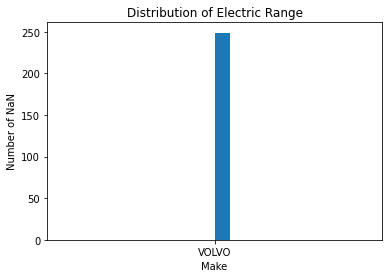

In [772]:
plt.hist(electric_vehicles_make_with_NaN['Make'], bins=20)
plt.xlabel('Make')
plt.ylabel('Number of NaN')
plt.title('Distribution of Electric Range')
plt.show()

If we can see the missing models are only from one __Make__ _Volvo_. We can delete this 240 rows, but we will lost information. So for the first loop the NaN will be replace with the value __Unknown__

The next step is to anylyse how we can catagorize the unique values of the __Models__ to numbers, that the machine leanring algorithmus can understand correctly.

In [776]:
len(electric_vehicles.Model.unique())

126

Now the question is which technic we can use fot the categorarization:
- OneHotEncoder - in this case we will create additional 126 colums. Later if needed we can reduce the number of the columns using another algorithmns and strategy to get better results.
- LabelEncoder - LabelEncoder could imply an ordinal relationship between the __Models__, which might not be accurate
- Set the Priority like the solution for __Country__, __City__ and __State__ - More as one model can have the same priority.
- another solution

First we will try with __OneHotEncoder__, because of the probems of the another solutions, that can be follow the missunderstanding the data by the learning process.

In [261]:
electric_vehicles.Model.value_counts()

Model
MODEL 3        25837
MODEL Y        23577
LEAF           13020
MODEL S         7473
BOLT EV         5419
               ...  
GV70               2
FLYING SPUR        1
918                1
Q8                 1
S-10 PICKUP        1
Name: count, Length: 125, dtype: int64

Create a pipeline for the frature __Model__

In [787]:
model_pipeline = Pipeline(steps = [
    ('fill_na', FunctionTransformer(func= fill_in_colum_with_unknown, kw_args={'column_name': 'Model'})),
    ('ohn_model', FunctionTransformer(func= execute_one_hod_encoder, kw_args={'column_name':'Model'})),
])

In [779]:
electric_vehicles = model_pipeline.fit_transform(electric_vehicles)

In [780]:
electric_vehicles.shape

(135038, 146)

## Feature - Electric Vehicle Type

In [782]:
electric_vehicles['Electric Vehicle Type'].unique()

array(['Battery Electric Vehicle (BEV)',
       'Plug-in Hybrid Electric Vehicle (PHEV)'], dtype=object)

In [783]:
electric_vehicle_type_pipeline = Pipeline(steps = [
    ('ohn_electric_vehicle_type', FunctionTransformer(func= execute_one_hod_encoder, kw_args={'column_name':'Electric Vehicle Type'})),
])

In [784]:
electric_vehicles = electric_vehicle_type_pipeline.fit_transform(electric_vehicles)

In [785]:
electric_vehicles.shape

(135038, 148)

## Feature - Electric Utility

In [786]:
electric_vehicles['Electric Utility'].unique()

array(['PUGET SOUND ENERGY INC',
       'CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)',
       'PUD NO 1 OF CHELAN COUNTY', 'PACIFICORP',
       'NON WASHINGTON STATE ELECTRIC UTILITY', 'AVISTA CORP',
       'PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)',
       'PUD NO 1 OF PEND OREILLE COUNTY', 'PUD NO 1 OF DOUGLAS COUNTY',
       'PUD NO 2 OF GRANT COUNTY', nan, 'MODERN ELECTRIC WATER COMPANY',
       'BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF CLARK COUNTY - (WA)',
       'BONNEVILLE POWER ADMINISTRATION||ORCAS POWER & LIGHT COOP',
       'PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM COUNTY',
       'BONNEVILLE POWER ADMINISTRATION||CITY OF TACOMA - (WA)||PENINSULA LIGHT COMPANY',
       'BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF CLALLAM COUNTY',
       'BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF COWLITZ COUNTY',
       'BONNEVILLE POWER ADMINISTRATION||PUD 1 OF SNOHOMISH COUNTY',
       'BONNEVILLE POWER ADMINISTRATION||CITY OF TACOMA - (WA)||PUD NO 1 OF LEWIS COUNTY',
    

In [788]:
electric_vehicles['Electric Utility'].value_counts()

Electric Utility
PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)                                      49369
PUGET SOUND ENERGY INC                                                             26606
CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)                                       24867
BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF CLARK COUNTY - (WA)                    7816
BONNEVILLE POWER ADMINISTRATION||CITY OF TACOMA - (WA)||PENINSULA LIGHT COMPANY     6041
                                                                                   ...  
CITY OF SEATTLE - (WA)                                                                 1
BONNEVILLE POWER ADMINISTRATION||PENINSULA LIGHT COMPANY                               1
BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF ASOTIN COUNTY                             1
BONNEVILLE POWER ADMINISTRATION||NESPELEM VALLEY ELEC COOP, INC                        1
BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF JEFFERSON COUNTY                          1
Name

In [794]:
electric_vehicles['Electric Utility'].isnull().sum()

8

## Feature - Vehicle Location

In [798]:
electric_vehicles[electric_vehicles['Vehicle Location'].isnull()]

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
149,1N4AZ0CP1D,NaN,NaN,AP,NaN,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75.0,0.0,NaN,112277063,NaN,NaN,NaN
95015,JTDKARFP1H,Pacific,Long Beach,WA,98634.0,2017,TOYOTA,PRIUS PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25.0,0.0,19.0,171247282,NaN,BONNEVILLE POWER ADMINISTRATION||PUD NO 2 OF P...,5.304995e+10
96534,1G1FW6S08N,Pacific,Long Beach,WA,98634.0,2022,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,19.0,218102209,NaN,BONNEVILLE POWER ADMINISTRATION||PUD NO 2 OF P...,5.304995e+10
116884,JTDKARFP2H,NaN,NaN,TX,NaN,2017,TOYOTA,PRIUS PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25.0,0.0,NaN,205594980,NaN,NaN,NaN
124298,5YJ3E1EBXJ,NaN,NaN,CA,NaN,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.0,0.0,NaN,345290382,NaN,NaN,NaN
126012,5YJYGAEE4M,NaN,NaN,KS,NaN,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,NaN,167228722,NaN,NaN,NaN
126131,5YJRE11B48,NaN,NaN,BC,NaN,2008,TESLA,ROADSTER,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,98950.0,NaN,143609049,NaN,NaN,NaN
130433,5YJYGDEEXM,NaN,NaN,CA,NaN,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,NaN,152377718,NaN,NaN,NaN
131491,JTDKN3DP5E,NaN,NaN,CA,NaN,2014,TOYOTA,PRIUS PLUG-IN,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,6.0,0.0,NaN,476092333,NaN,NaN,NaN
131586,5YJ3E1EA5K,NaN,NaN,BC,NaN,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,NaN,475254825,NaN,NaN,NaN


For 8 of the vehicle location can not be find out the correct location, becase the __county__, __city__ and __state__ are missing. 
There are two options 
- to drop the rows or
- to define a __Unknow__ state for points: __POINT (000.00000000000000 00.00000000000000)__

Option two will be use , becasue of the strategy following until now to replace NaN with __Unkonow__ values dependace of the format.

In [831]:

# Extract the latitude and longitude from the 'Vehicle Location' column
def extract_coordinates(x, index):
    coords = re.findall(r'-?\d+\.\d+', x)
    if len(coords) >= 2:
        return float(coords[index])
    else:
        return None

# unpack the coordinates 
def unpack_coordinates(df):
    # Convert the 'Vehicle Location' column to string type
    df['Vehicle Location'] = df['Vehicle Location'].astype(str)
    df['Longitude'] = df['Vehicle Location'].apply(lambda x: extract_coordinates(x, 0))
    df['Latitude'] = df['Vehicle Location'].apply(lambda x: extract_coordinates(x, 0))
    return df


#df = df.dropna(subset=['latitude', 'longitude'])


def fill_in_colum_with_point_unknown(df):
    column_values = df['Vehicle Location'].fillna('POINT (000.00000000000000 00.00000000000000)')
    df['Vehicle Location'] = column_values
    return  df
    
#electric_vehicles['Longitude'] = electric_vehicles['Vehicle Location'].apply(func=lambda x: x.x)
#electric_vehicles['Latitude'] = electric_vehicles['Vehicle Location'].apply(func=lambda x: x.y)

Create a Pipeline for the feature __Vehicle Location__

In [832]:
vehicle_location_feature_pipeline = Pipeline(steps = [
    ('fill_in_with_point_unknown', FunctionTransformer(func= fill_in_colum_with_point_unknown)),
    ('unpack_vehicle_location', FunctionTransformer(func= unpack_coordinates))
])

In [833]:
vehicle_location_feature_pipeline.fit_transform(electric_vehicles)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,...,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract,County_priority,City_priority,State_priority,Longitude,Latitude
0,5YJ3E1EA0K,Thurston,Tumwater,WA,98512.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,...,22.0,242565116,POINT (-122.91310169999997 47.01359260000004),PUGET SOUND ENERGY INC,5.306701e+10,166,599,46,-122.913102,-122.913102
1,1N4BZ1DV4N,Island,Clinton,WA,98236.0,2022,NISSAN,LEAF,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,...,10.0,183272785,POINT (-122.35936399999997 47.97965520000008),PUGET SOUND ENERGY INC,5.302997e+10,160,547,46,-122.359364,-122.359364
2,5YJ3E1EA0L,Snohomish,Snohomish,WA,98290.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,...,44.0,112552366,POINT (-122.09150499999998 47.91555500000004),PUGET SOUND ENERGY INC,5.306105e+10,169,634,46,-122.091505,-122.091505
3,5YJ3E1EBXL,King,Seattle,WA,98134.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,...,11.0,6336319,POINT (-122.32981499999994 47.579810000000066),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10,170,652,46,-122.329815,-122.329815
4,5YJSA1CP0D,Snohomish,Edmonds,WA,98020.0,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,...,21.0,186212960,POINT (-122.37507 47.80807000000004),PUGET SOUND ENERGY INC,5.306105e+10,169,631,46,-122.375070,-122.375070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135033,5YJSA1E29L,King,Yarrow Point,WA,98004.0,2020,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,...,48.0,124776627,POINT (-122.20190499999995 47.61385000000007),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10,170,534,46,-122.201905,-122.201905
135034,5YJYGDEE7M,King,Burien,WA,98168.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,...,33.0,142857676,POINT (-122.28645999999998 47.47613000000007),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303303e+10,170,611,46,-122.286460,-122.286460
135035,5YJSA1E51N,Pierce,Gig Harbor,WA,98335.0,2022,TESLA,MODEL S,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,...,26.0,220157724,POINT (-122.58354539999999 47.32344880000005),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305307e+10,168,633,46,-122.583545,-122.583545
135036,KM8KMDAF3P,Grant,Ephrata,WA,98823.0,2023,HYUNDAI,IONIQ 5,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,...,13.0,223872596,POINT (-119.55512999999996 47.319360000000074),PUD NO 2 OF GRANT COUNTY,5.302501e+10,148,469,46,-119.555130,-119.555130


Add to the feture Pipeline

## Feature - Base MSRP

The coulumn __Base MSRP__ contanins more as 95% of zeror or 95% of the information about the price is missing. 

In [889]:
electric_vehicles['Base MSRP'].value_counts()

Base MSRP
0.0         131612
69900.0       1432
31950.0        400
52900.0        214
32250.0        152
54950.0        136
59900.0        127
39995.0        122
36900.0        100
44100.0         97
64950.0         86
45600.0         75
33950.0         74
52650.0         63
34995.0         63
55700.0         51
36800.0         49
53400.0         36
110950.0        20
98950.0         20
81100.0         18
90700.0         17
75095.0         16
102000.0        15
43700.0         11
184400.0        11
109000.0         7
89100.0          6
32995.0          3
91250.0          3
845000.0         1
Name: count, dtype: int64

In [890]:
electric_vehicles['Base MSRP'].isnull().sum()

1

Replace the NaN with zero

In [891]:
def fill_in_colum_with_zero(df, column_name, to_fill_value):
    column_values = df[column_name].fillna(to_fill_value)
    df[column_name] = column_values
    return  df

In [892]:
electric_vehicles[electric_vehicles['Base MSRP'].isnull()]

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,...,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract,County_priority,City_priority,State_priority,Longitude,Latitude
59009,WP0BE2A7XP,Jefferson,Port Ludlow,WA,98365.0,2023,PORSCHE,PANAMERA,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,...,24.0,238952402,POINT (-122.68722849999995 47.928152400000045),BONNEVILLE POWER ADMINISTRATION||PUGET SOUND E...,5.303195e+10,158,524,46,-122.687228,-122.687228


In [893]:
def create_price_range_category(df, column='Base MSRP'):
    def categorize_price(price):
        if 0 <= price <= 25000 :
            return 0
        elif 25000 < price <= 40000:
            return 1
        elif 40000 < price <= 60000:
            return 2
        else:
            return 3

    df['Price_Range_Category'] = df[column].apply(categorize_price)
    return df

Create a Pipeline for the feature __Base MSRP__

In [895]:
base_msrp_feature_pipeline = Pipeline(steps = [
    ('fill_in_with_zero', FunctionTransformer(func = fill_in_colum_with_zero, kw_args={'column_name':'Base MSRP', 'to_fill_value': 0})),
    ('create_price_range_category', FunctionTransformer(func= create_price_range_category))
])

In [897]:
features_vehicles_pipeline = FeatureUnion([
    ('country_feature', country_pipeline),
    ('city_feature', city_pipeline),
    ('state_feature', state_pipeline),
    ('vehicle_location_feature', vehicle_location_feature_pipeline),
    ('base_msrp_feature', base_msrp_feature_pipeline)
    
    
])

In [903]:
features_vehicles_pipeline.fit(electric_vehicles)

FeatureUnion(transformer_list=[('country_feature',
                                Pipeline(steps=[('fill_na',
                                                 FunctionTransformer(func=<function fill_in_colum_with_unknown at 0x000001F6F29A10D0>,
                                                                     kw_args={'column_name': 'County'})),
                                                ('add_priority_numbers',
                                                 FunctionTransformer(func=<function add_priority_numbers at 0x000001F6F29A1700>,
                                                                     kw_args={'column_name': 'County'}))])),
                               ('city_feature',
                                Pi...
                                                 FunctionTransformer(func=<function unpack_coordinates at 0x000001F89E96D700>))])),
                               ('base_msrp_feature',
                                Pipeline(steps=[('fill_in_with_zero',
                                                 FunctionTransformer(func=<function fill_in_colum_with_zero at 0x000001F8F910EEE0>,
                                                                     kw_args={'column_name': 'Base '
                                                                                             'MSRP',
                                                                              'to_fill_value': 0})),
                                                ('create_price_range_category',
                                                 FunctionTransformer(func=<function create_price_range_category at 0x000001F8CEC649D0>))]))])

In [898]:
features_vehicles_pipeline.fit_transform(electric_vehicles)

array([['5YJ3E1EA0K', 'Thurston', 'Tumwater', ..., -122.91310169999997,
        -122.91310169999997, 0],
       ['1N4BZ1DV4N', 'Island', 'Clinton', ..., -122.35936399999997,
        -122.35936399999997, 0],
       ['5YJ3E1EA0L', 'Snohomish', 'Snohomish', ..., -122.09150499999998,
        -122.09150499999998, 0],
       ...,
       ['5YJSA1E51N', 'Pierce', 'Gig Harbor', ..., -122.58354539999999,
        -122.58354539999999, 0],
       ['KM8KMDAF3P', 'Grant', 'Ephrata', ..., -119.55512999999996,
        -119.55512999999996, 0],
       ['1FADP5CU4E', 'Kitsap', 'Port Orchard', ..., -122.63926499999997,
        -122.63926499999997, 0]], dtype=object)

In [902]:
electric_vehicles.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,...,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract,County_priority,City_priority,State_priority,Longitude,Latitude,Price_Range_Category
0,5YJ3E1EA0K,Thurston,Tumwater,WA,98512.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,...,242565116,POINT (-122.91310169999997 47.01359260000004),PUGET SOUND ENERGY INC,5.306701e+10,166,599,46,-122.913102,-122.913102,0
1,1N4BZ1DV4N,Island,Clinton,WA,98236.0,2022,NISSAN,LEAF,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,...,183272785,POINT (-122.35936399999997 47.97965520000008),PUGET SOUND ENERGY INC,5.302997e+10,160,547,46,-122.359364,-122.359364,0
2,5YJ3E1EA0L,Snohomish,Snohomish,WA,98290.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,...,112552366,POINT (-122.09150499999998 47.91555500000004),PUGET SOUND ENERGY INC,5.306105e+10,169,634,46,-122.091505,-122.091505,0
3,5YJ3E1EBXL,King,Seattle,WA,98134.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,...,6336319,POINT (-122.32981499999994 47.579810000000066),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10,170,652,46,-122.329815,-122.329815,0
4,5YJSA1CP0D,Snohomish,Edmonds,WA,98020.0,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,...,186212960,POINT (-122.37507 47.80807000000004),PUGET SOUND ENERGY INC,5.306105e+10,169,631,46,-122.375070,-122.375070,3


## Feature - Legislative District

In [904]:
electric_vehicles['Legislative District'].isnull().sum()

312

In [905]:
electric_vehicles['Legislative District'].value_counts()

Legislative District
41.0    9035
45.0    8353
48.0    7637
36.0    5961
1.0     5746
5.0     5669
46.0    5433
43.0    5320
11.0    4575
37.0    4137
34.0    4039
18.0    3583
44.0    3318
22.0    3285
21.0    3238
32.0    3235
40.0    3075
23.0    3036
26.0    2696
33.0    2628
10.0    2389
31.0    2359
47.0    2318
17.0    2316
27.0    1959
39.0    1944
24.0    1933
49.0    1879
35.0    1878
42.0    1872
28.0    1778
30.0    1547
2.0     1452
8.0     1426
25.0    1320
38.0    1263
6.0     1217
12.0    1217
20.0    1154
4.0     1048
13.0     889
14.0     874
29.0     855
19.0     784
9.0      735
16.0     705
3.0      666
7.0      633
15.0     317
Name: count, dtype: int64

Unknown will be set to 0 ,bcause the values if start with 1

In [907]:
electric_vehicles['Legislative District'].min()

1.0

In [908]:
electric_vehicles['Legislative District'].max()

49.0

Create a pipeline for the column __Legislative District__

In [910]:
legislative_district_feature_pipeline = Pipeline(steps = [
    ('fill_in_with_zero', FunctionTransformer(func = fill_in_colum_with_zero, kw_args={'column_name':'Legislative District', 'to_fill_value': 0})),
])

In [911]:
features_vehicles_pipeline = FeatureUnion([
    ('country_feature', country_pipeline),
    ('city_feature', city_pipeline),
    ('state_feature', state_pipeline),
    ('vehicle_location_feature', vehicle_location_feature_pipeline),
    ('base_msrp_feature', base_msrp_feature_pipeline),
    ('legislative_district_feature', legislative_district_feature_pipeline),
    
    
    
])

In [913]:
features_vehicles_pipeline.fit_transform(electric_vehicles)

array([['5YJ3E1EA0K', 'Thurston', 'Tumwater', ..., -122.91310169999997,
        -122.91310169999997, 0],
       ['1N4BZ1DV4N', 'Island', 'Clinton', ..., -122.35936399999997,
        -122.35936399999997, 0],
       ['5YJ3E1EA0L', 'Snohomish', 'Snohomish', ..., -122.09150499999998,
        -122.09150499999998, 0],
       ...,
       ['5YJSA1E51N', 'Pierce', 'Gig Harbor', ..., -122.58354539999999,
        -122.58354539999999, 0],
       ['KM8KMDAF3P', 'Grant', 'Ephrata', ..., -119.55512999999996,
        -119.55512999999996, 0],
       ['1FADP5CU4E', 'Kitsap', 'Port Orchard', ..., -122.63926499999997,
        -122.63926499999997, 0]], dtype=object)

In [914]:
electric_vehicles

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,...,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract,County_priority,City_priority,State_priority,Longitude,Latitude,Price_Range_Category
0,5YJ3E1EA0K,Thurston,Tumwater,WA,98512.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,...,242565116,POINT (-122.91310169999997 47.01359260000004),PUGET SOUND ENERGY INC,5.306701e+10,166,599,46,-122.913102,-122.913102,0
1,1N4BZ1DV4N,Island,Clinton,WA,98236.0,2022,NISSAN,LEAF,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,...,183272785,POINT (-122.35936399999997 47.97965520000008),PUGET SOUND ENERGY INC,5.302997e+10,160,547,46,-122.359364,-122.359364,0
2,5YJ3E1EA0L,Snohomish,Snohomish,WA,98290.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,...,112552366,POINT (-122.09150499999998 47.91555500000004),PUGET SOUND ENERGY INC,5.306105e+10,169,634,46,-122.091505,-122.091505,0
3,5YJ3E1EBXL,King,Seattle,WA,98134.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,...,6336319,POINT (-122.32981499999994 47.579810000000066),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10,170,652,46,-122.329815,-122.329815,0
4,5YJSA1CP0D,Snohomish,Edmonds,WA,98020.0,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,...,186212960,POINT (-122.37507 47.80807000000004),PUGET SOUND ENERGY INC,5.306105e+10,169,631,46,-122.375070,-122.375070,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135033,5YJSA1E29L,King,Yarrow Point,WA,98004.0,2020,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,...,124776627,POINT (-122.20190499999995 47.61385000000007),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10,170,534,46,-122.201905,-122.201905,0
135034,5YJYGDEE7M,King,Burien,WA,98168.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,...,142857676,POINT (-122.28645999999998 47.47613000000007),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303303e+10,170,611,46,-122.286460,-122.286460,0
135035,5YJSA1E51N,Pierce,Gig Harbor,WA,98335.0,2022,TESLA,MODEL S,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,...,220157724,POINT (-122.58354539999999 47.32344880000005),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305307e+10,168,633,46,-122.583545,-122.583545,0
135036,KM8KMDAF3P,Grant,Ephrata,WA,98823.0,2023,HYUNDAI,IONIQ 5,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,...,223872596,POINT (-119.55512999999996 47.319360000000074),PUD NO 2 OF GRANT COUNTY,5.302501e+10,148,469,46,-119.555130,-119.555130,0


In [915]:
electric_vehicles['Legislative District'].isnull().sum()

0

# Feature - Electric Range

 First filter only the electirc range with value > 0 for the calculation of the mean value. 
Calculate the mean value of the electic range in depandance of the Clean Alternative Fuel Vehicle (CAFV) Eligibility 	
and the Model. So you can calculate the mean value base of the information if the vehicle is a hybrid or electic an base of the model
because each model has different range.

In [347]:
#electric_range_without_zero = electric_vehicle_type["Electric Range"].ne(0)
#electric_range_without_zero = electric_vehicle_type[electric_vehicle_type[['Electric Range']].ne(0).any(1)]
#electric_range_without_zero = electric_vehicle_type[electric_vehicle_type[['Electric Range']].ne(0).any(1)]
electric_range_without_zero = electric_vehicles[electric_vehicles['Electric Range'] != 0.0]

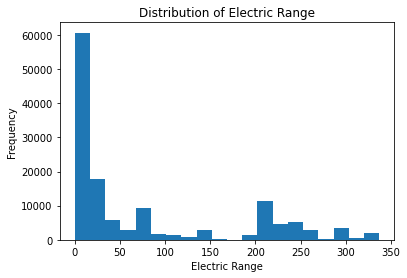

In [916]:
plt.hist(electric_vehicles['Electric Range'], bins=20)
plt.xlabel('Electric Range')
plt.ylabel('Frequency')
plt.title('Distribution of Electric Range')
plt.show()

In [348]:
electric_range_only_zero = electric_vehicles[electric_vehicles['Electric Range'] == 0.0]

In [349]:
electric_range_only_zero

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
1,1N4BZ1DV4N,Island,Clinton,WA,98236.0,2022,NISSAN,LEAF,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,10.0,183272785,POINT (-122.35936399999997 47.97965520000008),PUGET SOUND ENERGY INC,5.302997e+10
120,1FT6W1EVXN,Columbia,Dayton,WA,99328.0,2022,FORD,F-150,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,16.0,220469602,POINT (-117.97709499999996 46.32042500000006),PACIFICORP,5.301396e+10
126,5YJYGDEE7M,Island,Langley,WA,98260.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,10.0,151225896,POINT (-122.40801499999998 48.035570000000064),PUGET SOUND ENERGY INC,5.302997e+10
163,YV4ED3UR7M,Thurston,Olympia,WA,98502.0,2021,VOLVO,XC40,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,22.0,175438245,POINT (-122.92145 47.04593500000004),PUGET SOUND ENERGY INC,5.306701e+10
167,5YJ3E1EA5M,King,Seattle,WA,98125.0,2021,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,46.0,140930709,POINT (-122.29638499999999 47.715580000000045),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135028,7SAYGDEE6P,King,Bellevue,WA,98005.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,48.0,235234982,POINT (-122.16084999999998 47.62451500000003),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
135031,7SAYGDEF4N,King,North Bend,WA,98045.0,2022,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,5.0,215130366,POINT (-121.78140119999995 47.49353160000004),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
135034,5YJYGDEE7M,King,Burien,WA,98168.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,33.0,142857676,POINT (-122.28645999999998 47.47613000000007),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303303e+10
135035,5YJSA1E51N,Pierce,Gig Harbor,WA,98335.0,2022,TESLA,MODEL S,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,26.0,220157724,POINT (-122.58354539999999 47.32344880000005),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305307e+10


In [327]:
electric_range_without_zero

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EA0K,Thurston,Tumwater,WA,98512.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,22.0,242565116,POINT (-122.91310169999997 47.01359260000004),PUGET SOUND ENERGY INC,5.306701e+10
2,5YJ3E1EA0L,Snohomish,Snohomish,WA,98290.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,266.0,0.0,44.0,112552366,POINT (-122.09150499999998 47.91555500000004),PUGET SOUND ENERGY INC,5.306105e+10
3,5YJ3E1EBXL,King,Seattle,WA,98134.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322.0,0.0,11.0,6336319,POINT (-122.32981499999994 47.579810000000066),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1CP0D,Snohomish,Edmonds,WA,98020.0,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208.0,69900.0,21.0,186212960,POINT (-122.37507 47.80807000000004),PUGET SOUND ENERGY INC,5.306105e+10
5,WBY7Z8C5XJ,Chelan,Manson,WA,98831.0,2018,BMW,I3,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,97.0,0.0,12.0,215122904,POINT (-120.1531 47.88550500000008),PUD NO 1 OF CHELAN COUNTY,5.300796e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135029,1G1RD6S56H,Clark,Vancouver,WA,98682.0,2017,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,53.0,0.0,17.0,140190424,POINT (-122.51464729999998 45.67862000000008),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,5.301104e+10
135030,1C4JJXN68P,King,Seatac,WA,98148.0,2023,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21.0,0.0,33.0,235938776,POINT (-122.32806 47.46155),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
135032,5YJ3E1EC4L,Snohomish,Edmonds,WA,98020.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308.0,0.0,32.0,3315315,POINT (-122.37507 47.80807000000004),PUGET SOUND ENERGY INC,5.306105e+10
135033,5YJSA1E29L,King,Yarrow Point,WA,98004.0,2020,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,330.0,0.0,48.0,124776627,POINT (-122.20190499999995 47.61385000000007),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10


In [917]:
#electric_vehicle_type.iloc[:, electric_vehicle_type_index] = electric_vehicle_type["Electric Range"].mask(electric_vehicle_type["Electric Range"].eq(0.0), electric_vehicle_type["Electric Range"].mean())
#group_electrical_range = electric_range_without_zero.groupby(['Model','Make', 'Electric Vehicle Type'], as_index=False)['Electric Range'].mean()
group_electrical_range = electric_range_without_zero.groupby(['Electric Vehicle Type', 'Make'], as_index=False)['Electric Range'].mean()

In [918]:
group_electrical_range

,Electric Vehicle Type,Make,Electric Range
0,Battery Electric Vehicle (BEV),AUDI,209.398058
1,Battery Electric Vehicle (BEV),AZURE DYNAMICS,56.000000
2,Battery Electric Vehicle (BEV),BMW,98.994575
3,Battery Electric Vehicle (BEV),CHEVROLET,232.895964
4,Battery Electric Vehicle (BEV),FIAT,85.646840
5,Battery Electric Vehicle (BEV),FORD,78.155039
6,Battery Electric Vehicle (BEV),HYUNDAI,224.865900
7,Battery Electric Vehicle (BEV),JAGUAR,234.000000
8,Battery Electric Vehicle (BEV),KIA,176.103169
9,Battery Electric Vehicle (BEV),MERCEDES-BENZ,87.000000


In [919]:
group_electrical_range.Model.unique()

AttributeError: 'DataFrame' object has no attribute 'Model'

In [920]:
group_electrical_range.Make.unique()

array(['AUDI', 'AZURE DYNAMICS', 'BMW', 'CHEVROLET', 'FIAT', 'FORD',
       'HYUNDAI', 'JAGUAR', 'KIA', 'MERCEDES-BENZ', 'MINI', 'MITSUBISHI',
       'NISSAN', 'POLESTAR', 'PORSCHE', 'SMART', 'TESLA', 'TH!NK',
       'TOYOTA', 'VOLKSWAGEN', 'BENTLEY', 'CADILLAC', 'CHRYSLER',
       'FISKER', 'HONDA', 'JEEP', 'LAND ROVER', 'LEXUS', 'LINCOLN',
       'MAZDA', 'SUBARU', 'VOLVO', 'WHEEGO ELECTRIC CARS'], dtype=object)

In [921]:
#for index, row in group_electrical_range.iterrows():
#    electric_vehicles.loc[ electric_vehicles['Electric Range'] > 0.0 and electric_vehicles['Model'] == row['Model'], 'Electric Range'] = row['Electric Range']

for index, row in group_electrical_range.iterrows():
    mask = (electric_vehicles['Electric Range'] == 0.0) & (electric_vehicles['Make'] == row['Make'])
    electric_vehicles.loc[mask, 'Electric Range'] = row['Electric Range']
    #mask = (electric_vehicles['Electric Range'] == 0.0) & (electric_vehicles['Model'] == row['Model'])
    #electric_vehicles.loc[mask, 'Electric Range'] = row['Electric Range']

In [922]:
electric_vehicles

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,...,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract,County_priority,City_priority,State_priority,Longitude,Latitude,Price_Range_Category
0,5YJ3E1EA0K,Thurston,Tumwater,WA,98512.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,...,242565116,POINT (-122.91310169999997 47.01359260000004),PUGET SOUND ENERGY INC,5.306701e+10,166,599,46,-122.913102,-122.913102,0
1,1N4BZ1DV4N,Island,Clinton,WA,98236.0,2022,NISSAN,LEAF,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,...,183272785,POINT (-122.35936399999997 47.97965520000008),PUGET SOUND ENERGY INC,5.302997e+10,160,547,46,-122.359364,-122.359364,0
2,5YJ3E1EA0L,Snohomish,Snohomish,WA,98290.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,...,112552366,POINT (-122.09150499999998 47.91555500000004),PUGET SOUND ENERGY INC,5.306105e+10,169,634,46,-122.091505,-122.091505,0
3,5YJ3E1EBXL,King,Seattle,WA,98134.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,...,6336319,POINT (-122.32981499999994 47.579810000000066),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10,170,652,46,-122.329815,-122.329815,0
4,5YJSA1CP0D,Snohomish,Edmonds,WA,98020.0,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,...,186212960,POINT (-122.37507 47.80807000000004),PUGET SOUND ENERGY INC,5.306105e+10,169,631,46,-122.375070,-122.375070,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135033,5YJSA1E29L,King,Yarrow Point,WA,98004.0,2020,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,...,124776627,POINT (-122.20190499999995 47.61385000000007),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10,170,534,46,-122.201905,-122.201905,0
135034,5YJYGDEE7M,King,Burien,WA,98168.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,...,142857676,POINT (-122.28645999999998 47.47613000000007),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303303e+10,170,611,46,-122.286460,-122.286460,0
135035,5YJSA1E51N,Pierce,Gig Harbor,WA,98335.0,2022,TESLA,MODEL S,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,...,220157724,POINT (-122.58354539999999 47.32344880000005),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305307e+10,168,633,46,-122.583545,-122.583545,0
135036,KM8KMDAF3P,Grant,Ephrata,WA,98823.0,2023,HYUNDAI,IONIQ 5,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,...,223872596,POINT (-119.55512999999996 47.319360000000074),PUD NO 2 OF GRANT COUNTY,5.302501e+10,148,469,46,-119.555130,-119.555130,0


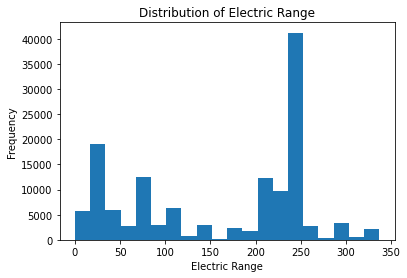

In [923]:
plt.hist(electric_vehicles['Electric Range'], bins=20)
plt.xlabel('Electric Range')
plt.ylabel('Frequency')
plt.title('Distribution of Electric Range')
plt.show()

Now the number of 0 is reduce from 60.. to XXX. The reason why not all 0s are 
How to mange the rest of the unkown or zeros values?
- Is it possible to find statistic values add there to the set?
- Is it possible to use another grpouping to replace the zeris values? 

In [390]:
electric_range_only_zero = electric_vehicles[electric_vehicles['Electric Range'] == 0.0]

In [391]:
electric_range_only_zero

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
120,1FT6W1EVXN,Columbia,Dayton,WA,99328.0,2022,FORD,F-150,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,16.0,220469602,POINT (-117.97709499999996 46.32042500000006),PACIFICORP,5.301396e+10
163,YV4ED3UR7M,Thurston,Olympia,WA,98502.0,2021,VOLVO,XC40,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,22.0,175438245,POINT (-122.92145 47.04593500000004),PUGET SOUND ENERGY INC,5.306701e+10
179,YV4ED3UR3M,King,Seattle,WA,98117.0,2021,VOLVO,XC40,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,36.0,171098266,POINT (-122.37275999999997 47.689685000000054),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
182,KM8K33AG7P,Spokane,Spokane,WA,99201.0,2023,HYUNDAI,KONA ELECTRIC,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,3.0,237648631,POINT (-117.43189499999994 47.66715500000004),MODERN ELECTRIC WATER COMPANY,5.306300e+10
192,WVGGNPE23N,King,Bellevue,WA,98008.0,2022,VOLKSWAGEN,ID.4,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,48.0,212182680,POINT (-122.11831999999998 47.62450000000007),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135009,WVGRMPE21M,Island,Camano Island,WA,98282.0,2021,VOLKSWAGEN,ID.4,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,10.0,161753658,POINT (-122.53109009999997 48.21927970000007),BONNEVILLE POWER ADMINISTRATION||PUD 1 OF SNOH...,5.302997e+10
135011,JTJAAAAB2P,Whatcom,Blaine,WA,98230.0,2023,LEXUS,RZ 450E,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,42.0,237965745,POINT (-122.74498999999997 48.99505000000005),CITY OF BLAINE - (WA)||PUD NO 1 OF WHATCOM COUNTY,5.307301e+10
135014,1GYKPMRK7P,Snohomish,Lynnwood,WA,98037.0,2023,CADILLAC,LYRIQ,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,21.0,239989172,POINT (-122.29726499999998 47.84182000000004),PUGET SOUND ENERGY INC,5.306105e+10
135020,WAUFJBFW5P,King,Shoreline,WA,98177.0,2023,AUDI,E-TRON GT,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,32.0,228757707,POINT (-122.38242499999996 47.77279000000004),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303302e+10


In [397]:
electric_range_only_zero['Make'].unique()

array(['FORD', 'VOLVO', 'HYUNDAI', 'VOLKSWAGEN', 'RIVIAN', 'SUBARU',
       'LUCID', 'KIA', 'AUDI', 'MERCEDES-BENZ', 'CHEVROLET', 'TOYOTA',
       'BMW', 'NISSAN', 'GENESIS', 'CADILLAC', 'LEXUS'], dtype=object)

In [386]:
electric_vehicles['Electric Range'].eq(0)

0         False
1         False
2         False
3         False
4         False
          ...  
135033    False
135034    False
135035    False
135036     True
135037    False
Name: Electric Range, Length: 135038, dtype: bool

In [924]:
def plot_value_counts(df, column, top_n=None):
    # Get the value counts for the specified column
    value_counts = df[column].value_counts()
    
    if top_n:
        value_counts = value_counts.head(top_n)
    
    # Set up the subplots
    fig, axes = plt.subplots(1, 2, figsize=(20, 7))
    
    # Create the pie chart
    value_counts.plot(kind='pie', ax=axes[0], autopct='%.1f%%', startangle=90, colors=sns.color_palette('pastel'))
    axes[0].set_ylabel('')
    axes[0].set_title(f'Percentage of {column}', fontsize=14)
    
    # Create the bar chart
    sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[1], palette='pastel')
    axes[1].set_title(f'Count of {column}', fontsize=14)
    axes[1].set_xlabel(column)
    axes[1].set_ylabel('Count')
    axes[1].tick_params(axis='x', rotation=30)

    for i, v in enumerate(value_counts.values):
        axes[1].text(i, v + 0.5, str(v), horizontalalignment='center', fontsize=12)
    
    # Set the suptitle for the entire figure
    fig.suptitle(f'{column} Distribution', fontsize=18, y=1.03)
    
    # Show the plots
    plt.show()

C:\Users\GETAC USER\AppData\Local\Temp\ipykernel_6828\3406674573.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[1], palette='pastel')


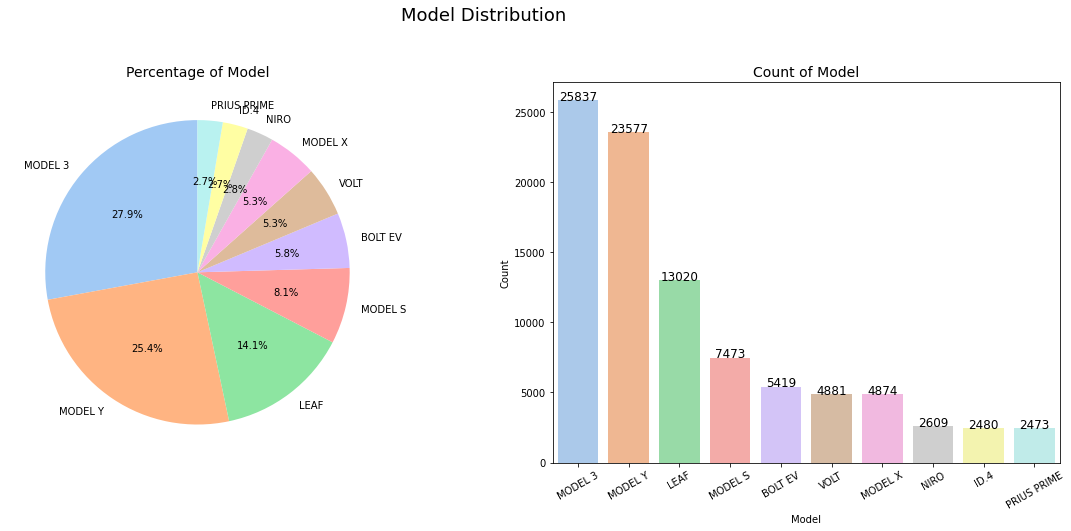

In [925]:
plot_value_counts(electric_vehicles, 'Model', top_n=10)

## Step 2: Performing EDA

In [200]:
#>>> le = LabelEncoder()
#>>> le.fit([1, 2, 2, 6])
le = LabelEncoder()
models = le.fit_transform(electric_vehicles.Model.values)
states = le.fit_transform(electric_vehicles.State)
city = le.fit_transform(electric_vehicles.City)
county = le.fit_transform(electric_vehicles.County)
make = le.fit_transform(electric_vehicles.Make)
cafv = le.fit_transform(electric_vehicles["Clean Alternative Fuel Vehicle (CAFV) Eligibility"])

In [201]:
electric_vehicles.Model = models
electric_vehicles.State = states
electric_vehicles.City = city
electric_vehicles.County = county
electric_vehicles.Make = make
electric_vehicles["Clean Alternative Fuel Vehicle (CAFV) Eligibility"] = cafv

In [202]:
electric_vehicles["Clean Alternative Fuel Vehicle (CAFV) Eligibility"].unique()

array([0, 1, 2])

In [203]:
electric_vehicles

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EA0K,155,592,44,98512.0,2019,30,71,Battery Electric Vehicle (BEV),0,220.0,0.0,22.0,242565116,POINT (-122.91310169999997 47.01359260000004),PUGET SOUND ENERGY INC,5.306701e+10
1,1N4BZ1DV4N,67,107,44,98236.0,2022,24,69,Battery Electric Vehicle (BEV),1,0.0,0.0,10.0,183272785,POINT (-122.35936399999997 47.97965520000008),PUGET SOUND ENERGY INC,5.302997e+10
2,5YJ3E1EA0L,142,533,44,98290.0,2020,30,71,Battery Electric Vehicle (BEV),0,266.0,0.0,44.0,112552366,POINT (-122.09150499999998 47.91555500000004),PUGET SOUND ENERGY INC,5.306105e+10
3,5YJ3E1EBXL,73,510,44,98134.0,2020,30,71,Battery Electric Vehicle (BEV),0,322.0,0.0,11.0,6336319,POINT (-122.32981499999994 47.579810000000066),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1CP0D,142,157,44,98020.0,2013,30,72,Battery Electric Vehicle (BEV),0,208.0,69900.0,21.0,186212960,POINT (-122.37507 47.80807000000004),PUGET SOUND ENERGY INC,5.306105e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135033,5YJSA1E29L,73,648,44,98004.0,2020,30,72,Battery Electric Vehicle (BEV),0,330.0,0.0,48.0,124776627,POINT (-122.20190499999995 47.61385000000007),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
135034,5YJYGDEE7M,73,67,44,98168.0,2021,30,74,Battery Electric Vehicle (BEV),1,0.0,0.0,33.0,142857676,POINT (-122.28645999999998 47.47613000000007),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303303e+10
135035,5YJSA1E51N,112,208,44,98335.0,2022,30,72,Battery Electric Vehicle (BEV),1,0.0,0.0,26.0,220157724,POINT (-122.58354539999999 47.32344880000005),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305307e+10
135036,KM8KMDAF3P,53,169,44,98823.0,2023,12,63,Battery Electric Vehicle (BEV),1,0.0,0.0,13.0,223872596,POINT (-119.55512999999996 47.319360000000074),PUD NO 2 OF GRANT COUNTY,5.302501e+10


In [ ]:
plt.hist(electric_vehicles['Electric Range'], bins=20)
plt.xlabel('Electric Range')
plt.ylabel('Frequency')
plt.title('Distribution of Electric Range')
plt.show()

In [204]:
electric_vehicles["Electric Vehicle Type"].value_counts()

Electric Vehicle Type
Battery Electric Vehicle (BEV)            103882
Plug-in Hybrid Electric Vehicle (PHEV)     31156
Name: count, dtype: int64

In [205]:
electric_vehicle_type_mapping = {type:idx for idx, type in enumerate(np.unique(electric_vehicles['Electric Vehicle Type']))}
#electric_vehicles

In [206]:
electric_vehicle_type_01 = electric_vehicles['Electric Vehicle Type'].map(electric_vehicle_type_mapping)

In [207]:
electric_vehicles['Electric Vehicle Type'] = electric_vehicle_type_01

In [208]:
electric_vehicles["Electric Vehicle Type"].value_counts()

Electric Vehicle Type
0    103882
1     31156
Name: count, dtype: int64

In [209]:
#Battery Electric Vehicle (BEV)
#df[(df == 'banana').any(axis=1)]
electric_vehicle_type = electric_vehicles[( electric_vehicles['Electric Vehicle Type'] == 0)]

In [210]:
electric_vehicle_type

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EA0K,155,592,44,98512.0,2019,30,71,0,0,220.0,0.0,22.0,242565116,POINT (-122.91310169999997 47.01359260000004),PUGET SOUND ENERGY INC,5.306701e+10
1,1N4BZ1DV4N,67,107,44,98236.0,2022,24,69,0,1,0.0,0.0,10.0,183272785,POINT (-122.35936399999997 47.97965520000008),PUGET SOUND ENERGY INC,5.302997e+10
2,5YJ3E1EA0L,142,533,44,98290.0,2020,30,71,0,0,266.0,0.0,44.0,112552366,POINT (-122.09150499999998 47.91555500000004),PUGET SOUND ENERGY INC,5.306105e+10
3,5YJ3E1EBXL,73,510,44,98134.0,2020,30,71,0,0,322.0,0.0,11.0,6336319,POINT (-122.32981499999994 47.579810000000066),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1CP0D,142,157,44,98020.0,2013,30,72,0,0,208.0,69900.0,21.0,186212960,POINT (-122.37507 47.80807000000004),PUGET SOUND ENERGY INC,5.306105e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135032,5YJ3E1EC4L,142,157,44,98020.0,2020,30,71,0,0,308.0,0.0,32.0,3315315,POINT (-122.37507 47.80807000000004),PUGET SOUND ENERGY INC,5.306105e+10
135033,5YJSA1E29L,73,648,44,98004.0,2020,30,72,0,0,330.0,0.0,48.0,124776627,POINT (-122.20190499999995 47.61385000000007),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
135034,5YJYGDEE7M,73,67,44,98168.0,2021,30,74,0,1,0.0,0.0,33.0,142857676,POINT (-122.28645999999998 47.47613000000007),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303303e+10
135035,5YJSA1E51N,112,208,44,98335.0,2022,30,72,0,1,0.0,0.0,26.0,220157724,POINT (-122.58354539999999 47.32344880000005),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305307e+10


In [211]:
# Plug-in Hybrid Electric Vehicle (PHEV) = 1
plug_in_hybrid_electric_vehicle = electric_vehicles[( electric_vehicles['Electric Vehicle Type'] == 1)]

In [212]:
electric_vehicles

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EA0K,155,592,44,98512.0,2019,30,71,0,0,220.0,0.0,22.0,242565116,POINT (-122.91310169999997 47.01359260000004),PUGET SOUND ENERGY INC,5.306701e+10
1,1N4BZ1DV4N,67,107,44,98236.0,2022,24,69,0,1,0.0,0.0,10.0,183272785,POINT (-122.35936399999997 47.97965520000008),PUGET SOUND ENERGY INC,5.302997e+10
2,5YJ3E1EA0L,142,533,44,98290.0,2020,30,71,0,0,266.0,0.0,44.0,112552366,POINT (-122.09150499999998 47.91555500000004),PUGET SOUND ENERGY INC,5.306105e+10
3,5YJ3E1EBXL,73,510,44,98134.0,2020,30,71,0,0,322.0,0.0,11.0,6336319,POINT (-122.32981499999994 47.579810000000066),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1CP0D,142,157,44,98020.0,2013,30,72,0,0,208.0,69900.0,21.0,186212960,POINT (-122.37507 47.80807000000004),PUGET SOUND ENERGY INC,5.306105e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135033,5YJSA1E29L,73,648,44,98004.0,2020,30,72,0,0,330.0,0.0,48.0,124776627,POINT (-122.20190499999995 47.61385000000007),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
135034,5YJYGDEE7M,73,67,44,98168.0,2021,30,74,0,1,0.0,0.0,33.0,142857676,POINT (-122.28645999999998 47.47613000000007),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303303e+10
135035,5YJSA1E51N,112,208,44,98335.0,2022,30,72,0,1,0.0,0.0,26.0,220157724,POINT (-122.58354539999999 47.32344880000005),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305307e+10
135036,KM8KMDAF3P,53,169,44,98823.0,2023,12,63,0,1,0.0,0.0,13.0,223872596,POINT (-119.55512999999996 47.319360000000074),PUD NO 2 OF GRANT COUNTY,5.302501e+10


In [213]:
electric_vehicle_type_index = electric_vehicle_type.columns.get_loc("Electric Range")

In [214]:
electric_vehicle_type.iloc[:, electric_vehicle_type_index] = electric_vehicle_type["Electric Range"].mask(electric_vehicle_type["Electric Range"].eq(0.0), electric_vehicle_type["Electric Range"].mean())

In [215]:
electric_vehicle_type

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EA0K,155,592,44,98512.0,2019,30,71,0,0,220.000000,0.0,22.0,242565116,POINT (-122.91310169999997 47.01359260000004),PUGET SOUND ENERGY INC,5.306701e+10
1,1N4BZ1DV4N,67,107,44,98236.0,2022,24,69,0,1,87.780838,0.0,10.0,183272785,POINT (-122.35936399999997 47.97965520000008),PUGET SOUND ENERGY INC,5.302997e+10
2,5YJ3E1EA0L,142,533,44,98290.0,2020,30,71,0,0,266.000000,0.0,44.0,112552366,POINT (-122.09150499999998 47.91555500000004),PUGET SOUND ENERGY INC,5.306105e+10
3,5YJ3E1EBXL,73,510,44,98134.0,2020,30,71,0,0,322.000000,0.0,11.0,6336319,POINT (-122.32981499999994 47.579810000000066),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1CP0D,142,157,44,98020.0,2013,30,72,0,0,208.000000,69900.0,21.0,186212960,POINT (-122.37507 47.80807000000004),PUGET SOUND ENERGY INC,5.306105e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135032,5YJ3E1EC4L,142,157,44,98020.0,2020,30,71,0,0,308.000000,0.0,32.0,3315315,POINT (-122.37507 47.80807000000004),PUGET SOUND ENERGY INC,5.306105e+10
135033,5YJSA1E29L,73,648,44,98004.0,2020,30,72,0,0,330.000000,0.0,48.0,124776627,POINT (-122.20190499999995 47.61385000000007),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
135034,5YJYGDEE7M,73,67,44,98168.0,2021,30,74,0,1,87.780838,0.0,33.0,142857676,POINT (-122.28645999999998 47.47613000000007),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303303e+10
135035,5YJSA1E51N,112,208,44,98335.0,2022,30,72,0,1,87.780838,0.0,26.0,220157724,POINT (-122.58354539999999 47.32344880000005),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305307e+10


In [216]:
plug_in_hybrid_electric_vehicle_index = plug_in_hybrid_electric_vehicle.columns.get_loc("Electric Range")

In [217]:
plug_in_hybrid_electric_vehicle.iloc[:, plug_in_hybrid_electric_vehicle_index] = plug_in_hybrid_electric_vehicle["Electric Range"].mask(plug_in_hybrid_electric_vehicle["Electric Range"].eq(0.0), plug_in_hybrid_electric_vehicle["Electric Range"].mean())

In [218]:
#new_electric_vehicles = [electric_vehicle_type, plug_in_hybrid_electric_vehicle]
#new_electric_vehicles.appned(electric_vehicle_type)plug_in_hybrid_electric_vehicle
#new_electric_vehicles.append(plug_in_hybrid_electric_vehicle)

#frames = [df1, df2, df3]
import random
dfs = [electric_vehicle_type, plug_in_hybrid_electric_vehicle]
#random.shuffle(dfs)
electric_vehicles.iloc[:,:] = pd.concat(dfs, axis=0)
electric_vehicles = electric_vehicles.sample(frac=1)

In [219]:
electric_vehicles

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
9552,5YJ3E1EB3K,47,423,44,99301.0,2019,30,71,0,0,220.000000,0.0,9.0,190377701,POINT (-119.09819999999996 46.232395000000054),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF F...,5.302102e+10
95445,5YJ3E1EA0N,73,510,44,98122.0,2022,30,71,0,1,87.780838,0.0,37.0,211877725,POINT (-122.30838999999997 47.61036500000006),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
47232,5YJYGDEE9M,73,463,44,98072.0,2021,30,74,0,1,87.780838,0.0,45.0,168737537,POINT (-122.15166499999998 47.75855000000007),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
133937,YV4BR0CK0M,142,54,44,98021.0,2021,34,124,1,2,18.000000,0.0,1.0,154981592,POINT (-122.17945799999995 47.80258900000007),PUGET SOUND ENERGY INC,5.306105e+10
41065,1G1FY6S03K,73,510,44,98104.0,2019,5,17,0,0,238.000000,0.0,43.0,318802438,POINT (-122.32907499999999 47.601800000000026),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,5YJ3E1EA8P,142,173,44,98204.0,2023,30,71,0,1,87.780838,0.0,21.0,237689203,POINT (-122.24128499999995 47.91088000000008),PUGET SOUND ENERGY INC,5.306104e+10
2253,5YJXCBE22K,75,273,44,98346.0,2019,30,73,0,0,289.000000,0.0,23.0,294815643,POINT (-122.50155999999998 47.801900000000046),PUGET SOUND ENERGY INC,5.303509e+10
56668,5YJ3E1EB3K,142,533,44,98296.0,2019,30,71,0,0,220.000000,0.0,44.0,475625573,POINT (-122.15133999999995 47.88511580000005),PUGET SOUND ENERGY INC,5.306105e+10
19687,5YJ3E1EA5J,142,533,44,98296.0,2018,30,71,0,0,215.000000,0.0,44.0,202227266,POINT (-122.15133999999995 47.88511580000005),PUGET SOUND ENERGY INC,5.306105e+10


In [220]:
plug_in_hybrid_electric_vehicle["Electric Range"].min()

6.0

In [221]:
plug_in_hybrid_electric_vehicle["Electric Range"].max()

153.0

In [222]:
electric_vehicle_type["Electric Range"].min()

29.0

In [223]:
electric_vehicle_type["Electric Range"].max()

337.0

## Feature Engineering - Electric Range

In [224]:
# Plug-in Hybrid Electric Vehicle (PHEV) = 1
# Battery Electric Vehicle (BEV) = 0
def create_electric_range_category(df, column='Electric Range'):
    def categorize_range(columns):
        electric_range = columns['Electric Range']
        electric_vehicle_type = columns['Electric Vehicle Type']
        if electric_range == 0:
            return 0
        elif 0.0 < electric_range < 50 and electric_vehicle_type == 0:
            return 1 #10 #very Short
        elif 50 <= electric_range <= 100 and electric_vehicle_type == 0:
            return 2 #20 #Short
        elif 100 < electric_range <= 300 and electric_vehicle_type == 0:
            return 3 #30 #Medium
        elif 300 < electric_range <= 550 and electric_vehicle_type == 0:
            return 4 #40 #long
        elif 550 < electric_range and electric_vehicle_type == 0:
            return 5 #50 # Extry long
        elif electric_range < 10 and electric_vehicle_type == 1:
            return 1 #very Short
        elif 10 <= electric_range <= 50 and electric_vehicle_type == 1:
            return 2 #Short
        elif 50 < electric_range <= 80 and electric_vehicle_type == 1:
            return 3 #Medium
        elif 80 < electric_range <= 160 and electric_vehicle_type == 1:
            return 4 #long
        elif 160 < electric_range and electric_vehicle_type == 1:
            return 5 # Extry lo
        else:
            return -1.0
        #if electric_range == 0:
        #    return 0.0
        #elif electric_range < 50:
        #    return 1.0 #very Short
        #elif 50 <= electric_range <= 100:
        #    return 3.0 #very Short
        #elif 100 < electric_range <= 300:
        #    return 4.0 #"Medium"
        #elif 300 < electric_range:
        #    return 5.0 #long
        #else:
        #    return -1.0

    df['Electric_Range_Category'] = df.apply(categorize_range, axis=1)
    return df

electric_vehicles = create_electric_range_category(electric_vehicles, column='Electric Range')



In [225]:
electric_vehicles

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract,Electric_Range_Category
9552,5YJ3E1EB3K,47,423,44,99301.0,2019,30,71,0,0,220.000000,0.0,9.0,190377701,POINT (-119.09819999999996 46.232395000000054),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF F...,5.302102e+10,3.0
95445,5YJ3E1EA0N,73,510,44,98122.0,2022,30,71,0,1,87.780838,0.0,37.0,211877725,POINT (-122.30838999999997 47.61036500000006),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10,2.0
47232,5YJYGDEE9M,73,463,44,98072.0,2021,30,74,0,1,87.780838,0.0,45.0,168737537,POINT (-122.15166499999998 47.75855000000007),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10,2.0
133937,YV4BR0CK0M,142,54,44,98021.0,2021,34,124,1,2,18.000000,0.0,1.0,154981592,POINT (-122.17945799999995 47.80258900000007),PUGET SOUND ENERGY INC,5.306105e+10,2.0
41065,1G1FY6S03K,73,510,44,98104.0,2019,5,17,0,0,238.000000,0.0,43.0,318802438,POINT (-122.32907499999999 47.601800000000026),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,5YJ3E1EA8P,142,173,44,98204.0,2023,30,71,0,1,87.780838,0.0,21.0,237689203,POINT (-122.24128499999995 47.91088000000008),PUGET SOUND ENERGY INC,5.306104e+10,2.0
2253,5YJXCBE22K,75,273,44,98346.0,2019,30,73,0,0,289.000000,0.0,23.0,294815643,POINT (-122.50155999999998 47.801900000000046),PUGET SOUND ENERGY INC,5.303509e+10,3.0
56668,5YJ3E1EB3K,142,533,44,98296.0,2019,30,71,0,0,220.000000,0.0,44.0,475625573,POINT (-122.15133999999995 47.88511580000005),PUGET SOUND ENERGY INC,5.306105e+10,3.0
19687,5YJ3E1EA5J,142,533,44,98296.0,2018,30,71,0,0,215.000000,0.0,44.0,202227266,POINT (-122.15133999999995 47.88511580000005),PUGET SOUND ENERGY INC,5.306105e+10,3.0


In [226]:
pd.get_dummies(electric_vehicles[["Electric Vehicle Type","Electric_Range_Category"]])

,Electric Vehicle Type,Electric_Range_Category
9552,0,3.0
95445,0,2.0
47232,0,2.0
133937,1,2.0
41065,0,3.0
...,...,...
160,0,2.0
2253,0,3.0
56668,0,3.0
19687,0,3.0


In [227]:
#electric_vehicles.dropna(subset=["Electric Range"])
electric_vehicles = electric_vehicles[electric_vehicles['Electric Range'].notna()]

In [228]:
electric_vehicles['Electric Range'].isna().sum()

0

In [229]:
#columns_to_drop = ['County', 'City', 'State', 'Postal Code']
#df = df.drop(columns=columns_to_drop)

col_model_year_index = electric_vehicles.columns.get_loc("Model Year")
electric_vehicles.iloc[:, col_model_year_index] = pd.to_numeric(electric_vehicles['Model Year'], errors="ignore") 

#print(electric_vehicles.dtypes)

#assenger_attributes.drop(columns = ["PassengerId", "Name", "Cabin"])
X = electric_vehicles[['Base MSRP', "Model Year", 'City', 'State', 'County','Make', 'Model', 'Electric Range']]
#X = electric_vehicles.drop(columns = ['Electric Range'])

y = electric_vehicles['Electric_Range_Category']
#scaler = MinMaxScaler()
#y = scaler.fit_transform(electric_vehicles['Electric_Range_Category'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=424)

#linear_model = LogisticRegression(C = 1e10)
#model = LogisticRegression(C = 10e9)
#linear_model.fit(X_train, y_train)

#y_pred = linear_model.predict(X_test)

In [230]:
scaler_standard = StandardScaler()


In [231]:
scaler_standard.fit_transform(X_train)

array([[-0.14863257,  1.1118097 , -0.20239357, ..., -0.99575664,
        -0.30018655, -0.30538907],
       [-0.14863257,  0.44454105,  0.84407038, ...,  0.71432423,
         0.10174517, -0.30538907],
       [-0.14863257, -0.88999626, -1.57522993, ...,  0.90433322,
         0.54387007, -1.10845959],
       ...,
       [-0.14863257,  0.44454105, -1.63739611, ..., -0.80574765,
         1.95063112, -1.10845959],
       [-0.14863257,  1.1118097 ,  0.56950311, ...,  0.71432423,
         0.02135883, -0.30538907],
       [-0.14863257,  0.77817538, -1.5648689 , ...,  0.14429728,
        -0.05902752, -0.30538907]])

c:\python39\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


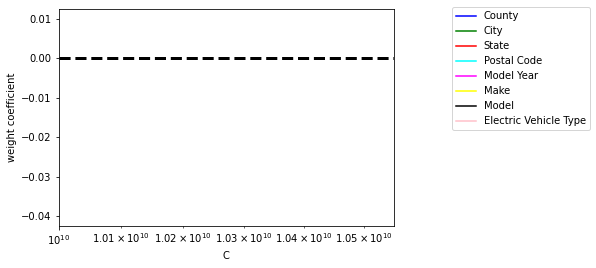

In [177]:
fig = plt.figure()
ax = plt.subplot(111)
    
colors = ['blue', 'green', 'red', 'cyan', 
          'magenta', 'yellow', 'black', 
          'pink', 'lightgreen', 'lightblue', 
          'gray', 'indigo', 'orange']

weights, params = [], []
for c in np.arange(1):
    linear_model = LogisticRegression(C = 1e10)
    #linear_model = LogisticRegression(penalty='l1', C=10.**c, random_state=0,  solver='liblinear', max_iter=1000)
    linear_model.fit(X_train, y_train)
    weights.append(linear_model.coef_[1])
    params.append(1e10)

weights = np.array(weights)

for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column],
             label=electric_vehicles.columns[column + 1],
             color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim(1e10)
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center', 
          bbox_to_anchor=(1.38, 1.03),
          ncol=1, fancybox=True)
plt.show()



In [232]:
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1e10]
    
}

grid_search = GridSearchCV(LogisticRegression(solver='lbfgs', max_iter=100), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters: ", grid_search.best_params_)

c:\python39\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\python39\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

Best parameters:  {'C': 100, 'penalty': 'l2'}


c:\python39\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [233]:
y_pred = linear_model.predict(X_test)

In [234]:
y_pred

array([2., 2., 2., ..., 2., 2., 2.])

In [235]:
linear_model.score(X_train,y_train)

0.9425019836022216

In [236]:
linear_model.score(X_test,y_test)

0.943646327014218

In [237]:
 # Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

# Print the classification report and confusion matrix for each classifier
print(f'Best Hyperparameters: {grid_search.best_params_}')
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1_score:.4f}\n')

Best Hyperparameters: {'C': 100, 'penalty': 'l2'}
Accuracy: 0.9436
Precision: 0.9380
Recall: 0.9436
F1 Score: 0.9375



c:\python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [238]:
mlflow.log_artifact("data/Electric_Vehicle_Population_Data.csv")

In [242]:
#Parameters
mlflow.log_param("C", "100")
mlflow.log_param("train_test_split", True)
mlflow.log_param("random_state", 424)
mlflow.log_param("test_size", 0.3)
mlflow.log_param("Best parameters", grid_search.best_params_)
mlflow.log_param("Accuracy", accuracy)
mlflow.log_param("Precision",precision)
mlflow.log_param("Recall", recall)
mlflow.log_param("F1 Score",f1_score)
# Log the best parameters
#mlflow.log_param("C", best_params['classifier__C'])
#mlflow.log_param("penalty", best_params['classifier__penalty'])

# Log the model
#mlflow.sklearn.log_model("LogisticRegression", "model")
#mlflow.log_model("LogisticRegression", "model")
#mlflow.log_

 # Infer the model signature
signature = infer_signature(X_test, y_pred)

mlflow.sklearn.log_model(
        sk_model=linear_model,
        artifact_path="sklearn-model",
        signature=signature,
        registered_model_name="LogisticRegression",
    )

# Metics
for train_step in range(100):
    mlflow.log_metric("test_metrics", train_step **2, step = train_step) # accuracy

mlflow.log_metrics({"mse": mean_squared_error(y_test, y_pred)})
mlflow.log_metrics({"Correct classification Rate Training data": linear_model.score(X_train,y_train)})
mlflow.log_metrics({"Correct classification Rate Test data": linear_model.score(X_test,y_test)})


MlflowException: Changing param values is not allowed. Param with key='C' was already logged with value='1' for run ID='9b04e7fe99704351b73b464b3118b887'. Attempted logging new value '100'.

The cause of this error is typically due to repeated calls
to an individual run_id event logging.

Incorrect Example:
---------------------------------------
with mlflow.start_run():
    mlflow.log_param("depth", 3)
    mlflow.log_param("depth", 5)
---------------------------------------

Which will throw an MlflowException for overwriting a
logged parameter.

Correct Example:
---------------------------------------
with mlflow.start_run():
    with mlflow.start_run(nested=True):
        mlflow.log_param("depth", 3)
    with mlflow.start_run(nested=True):
        mlflow.log_param("depth", 5)
---------------------------------------

Which will create a new nested run for each individual
model and prevent parameter key collisions within the
tracking store.

In [243]:
mlflow.end_run()